# Data
- result : list of simulation datasets, inherent clusters, found clusters by 5 clustering methods, monoton functions by MOCL etc.
- rand : mean values of rand index between found clusters and inherent ordinal&nominal clusters
- var_sel : mean of variable selection accuracy (ordinal, nominal, noise)

In [12]:
library(latex2exp)

result_chr_nom=readRDS("Simulation_CHI_nom_results.RData")
rand_chr_nom=readRDS("Simulation_CHI_nom_RandIndex.RData")
var_chr_nom=readRDS("Simulation_CHI_nom_Varsel.RData")

result_chr_ord=readRDS("Simulation_CHI_ord_results.RData")
rand_chr_ord=readRDS("Simulation_CHI_ord_RandIndex.RData")
var_chr_ord=readRDS("Simulation_CHI_ord_Varsel.RData")



In [13]:
rand_okm_chr_nom=readRDS("OKM_rand_CHI_nom.RData")
rand_okm_chr_ord=readRDS("OKM_rand_CHI_ord.RData")

In [17]:
rand_chr_nom$rand_or

,MOCL,SKM_1sd,VSL,KMPP,PAM
0,0.952,0.964,0.973,0.734,0.683
0.2,0.955,0.966,0.972,0.740,0.679
0.4,0.951,0.962,0.971,0.733,0.682
0.6,0.951,0.900,0.972,0.730,0.673
0.8,0.950,0.720,0.629,0.727,0.668
1,0.951,0.691,0.627,0.721,0.661
1.2,0.942,0.681,0.627,0.721,0.652
1.4,0.954,0.667,0.626,0.719,0.655
1.6,0.951,0.659,0.627,0.716,0.655
1.8,0.953,0.658,0.627,0.719,0.646


In [19]:
cbind(rand_chr_nom$rand_or,rand_okm_chr_nom$or)

,MOCL,SKM_1sd,VSL,KMPP,PAM,
0,0.952,0.964,0.973,0.734,0.683,0.8123819
0.2,0.955,0.966,0.972,0.740,0.679,0.8309749
0.4,0.951,0.962,0.971,0.733,0.682,0.8991960
0.6,0.951,0.900,0.972,0.730,0.673,0.8869246
0.8,0.950,0.720,0.629,0.727,0.668,0.8693869
1,0.951,0.691,0.627,0.721,0.661,0.7998894
1.2,0.942,0.681,0.627,0.721,0.652,0.8707337
1.4,0.954,0.667,0.626,0.719,0.655,0.8893166
1.6,0.951,0.659,0.627,0.716,0.655,0.8667136
1.8,0.953,0.658,0.627,0.719,0.646,0.8590452


# Rand index

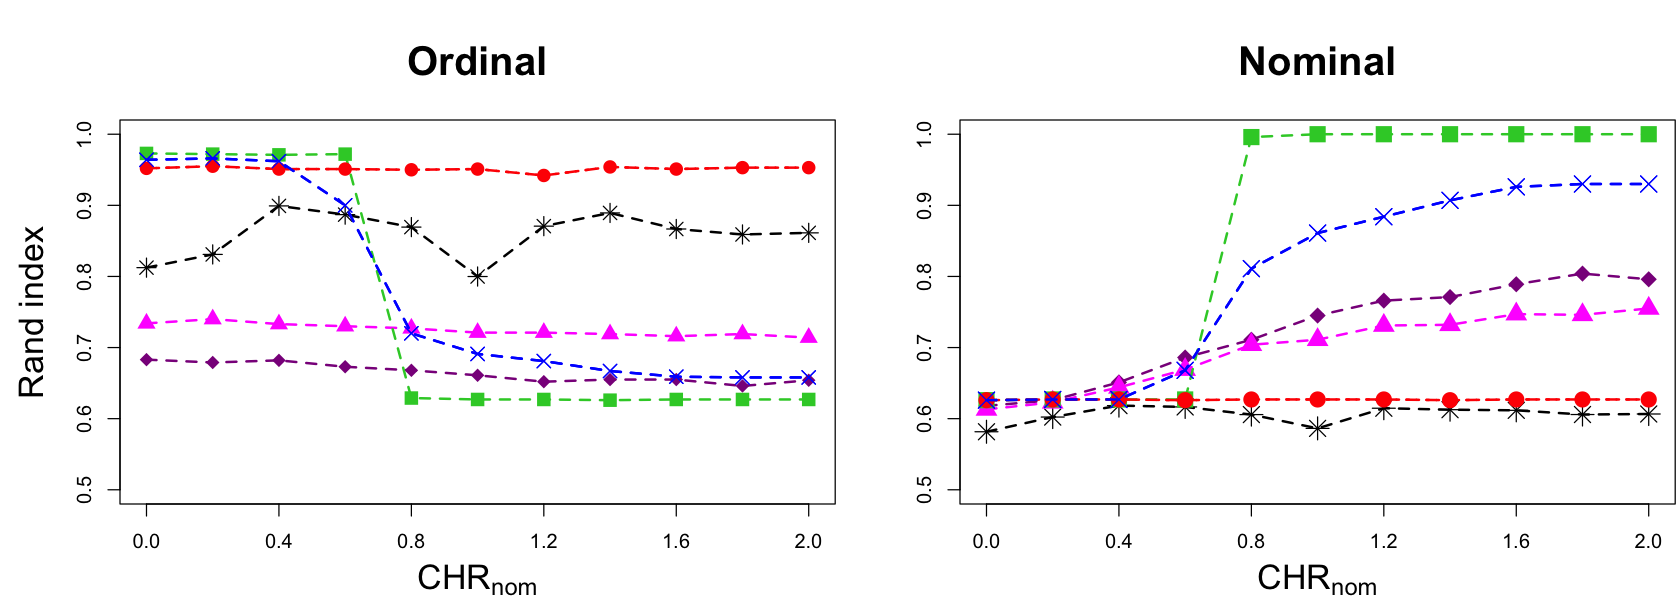

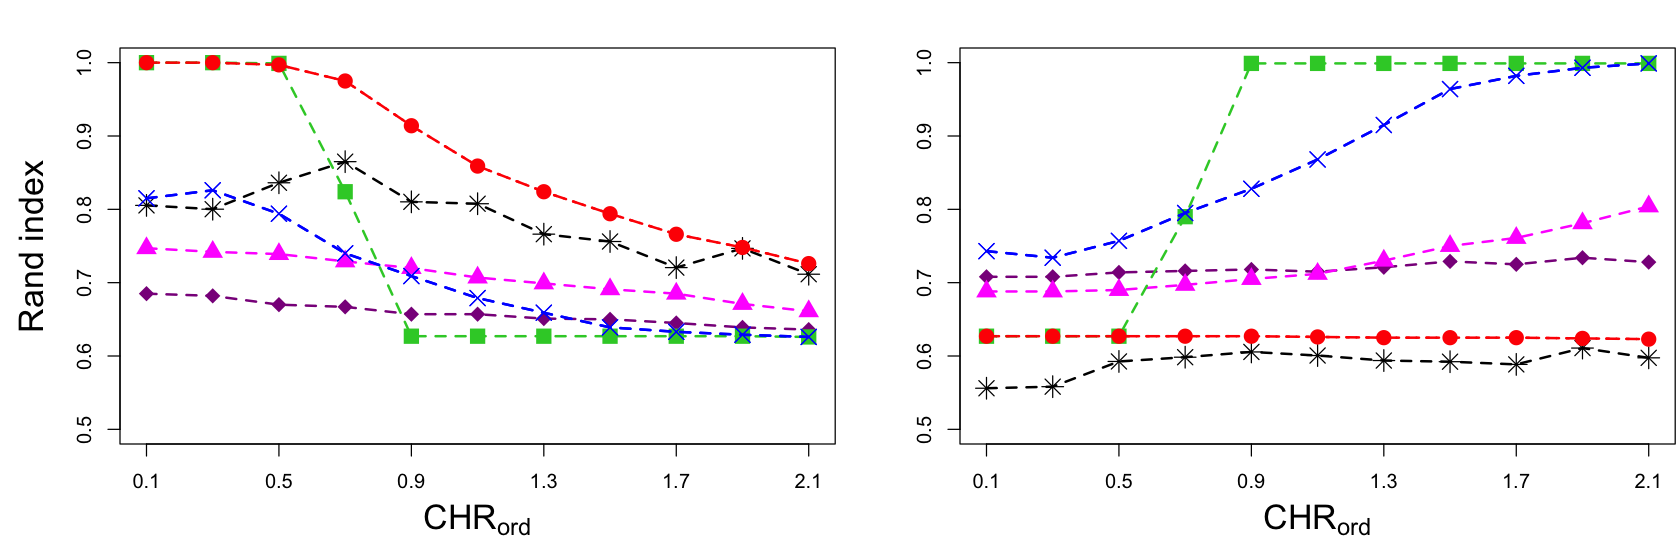

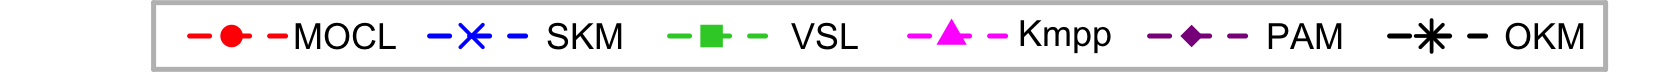

In [31]:
options(repr.plot.width = 14, repr.plot.height = 5)

par(mfrow=c(1,2))
par(mar=c(4,5,5,0.2))

pch_lst=c(16,4.2,15,17,18,8)
col_lst=c("red","blue","Lime Green","magenta","Dark Magenta","Black")


######################################################################
############################# CHR_nom ################################
CHR=c(0:10)/5
rand_mat=cbind(rand_chr_nom$rand_or,rand_okm_chr_nom$or)
rand_no_mat=cbind(rand_chr_nom$rand_no,rand_okm_chr_nom$no)

colnames(rand_mat)=c(colnames(rand_chr_nom$rand_or),"OKM")
colnames(rand_no_mat)=c(colnames(rand_chr_nom$rand_or),"OKM")

###############################
# rand index_or (CHR_nom)

plot(CHR,rand_mat[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0.5,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{nom}$"),ylab="Rand index",main="Ordinal",cex.main=2,cex.lab=1.7)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1)-0.1)
#TeX("$\\hat{m}_j$")
for(i in c(ncol(rand_mat):1,2)){
    lines(CHR,rand_mat[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,rand_mat[,i],pch=pch_lst[i],col=col_lst[i],cex=1.5,cex.lab=1.8)
}

###############################
# rand no index (CHR_nom)

plot(CHR,rand_no_mat[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0.5,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{nom}$"),ylab="",main="Nominal",cex.main=2,cex.lab=1.7)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1)-0.1)

for(i in c(ncol(rand_no_mat):1,2)){
    lines(CHR,rand_no_mat[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,rand_no_mat[,i],pch=pch_lst[i],col=col_lst[i],cex=1.8)
}


######################################################################
############################# CHR_ord ################################
options(repr.plot.width = 14, repr.plot.height = 4.5)
par(mfrow=c(1,2))
par(mar=c(4,5,2,0.2))

CHR=c(0:10)/5+0.1
rand_mat=cbind(rand_chr_ord$rand_or,rand_okm_chr_ord$or)
rand_no_mat=cbind(rand_chr_ord$rand_no,rand_okm_chr_ord$no)
#rand_mat=rand_chr_ord$rand_or
#rand_no_mat=rand_chr_ord$rand_no
colnames(rand_mat)=c(colnames(rand_chr_nom$rand_or),"OKM")
colnames(rand_no_mat)=c(colnames(rand_chr_nom$rand_or),"OKM")

###############################
# rand index (CHR_ord)
plot(c(0:10)/5+0.1,rand_mat[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0.5,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{ord}$"),ylab="Rand index",main="",cex.main=2,cex.lab=1.7)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1))
#TeX("$\\hat{m}_j$")
for(i in c(ncol(rand_mat):1,2)){
    lines(CHR,rand_mat[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,rand_mat[,i],pch=pch_lst[i],col=col_lst[i],cex=1.7,cex.lab=1.5)
}

###############################
# rand no index (CHR_)
plot(c(0:10)/5+0.1,rand_no_mat[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0.5,1),col=col_lst[1],
     lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{ord}$"),ylab="",main="",cex.main=2,cex.lab=1.7)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1))

for(i in c(ncol(rand_no_mat):1,2)){
    lines(CHR,rand_no_mat[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,rand_no_mat[,i],pch=pch_lst[i],col=col_lst[i],cex=1.7)
}

######################################################################
####################### Legend ####################################
options(repr.plot.width = 14, repr.plot.height = 0.6)
par(mar=c(0,5,0,0.2))
par(mfrow=c(1,1))
text_lst=c("MOCL","SKM","VSL","Kmpp","PAM","OKM")

plot(0,xlim=c(0,1.2),ylim=c(9,11), axes = FALSE, xlab = "", ylab = "", type = "n")
#lines(c())
for(i in c(1:6)){
    y_l=10
    lines(c(0,0.08)+0.2*(i-1)+0.01,c(y_l,y_l),lwd=4,lty=2,col=col_lst[i])
    points(0.04+0.2*(i-1)+0.005,y_l,pch=pch_lst[i],col=col_lst[i],cex=2.5,lwd=3)
    text(0.14+0.2*(i-1),y_l,text_lst[i],cex=1.8)
}

# grey box
lines(c(-0.02,1.19),c(11,11),lwd=4,col="grey")
lines(c(-0.02,1.19),c(9,9),lwd=4,col="grey")
lines(c(-0.02,-0.02),c(9,11),lwd=4,col="grey")
lines(c(01.19,1.19),c(9,11),lwd=4,col="grey")

# Varaible Selection

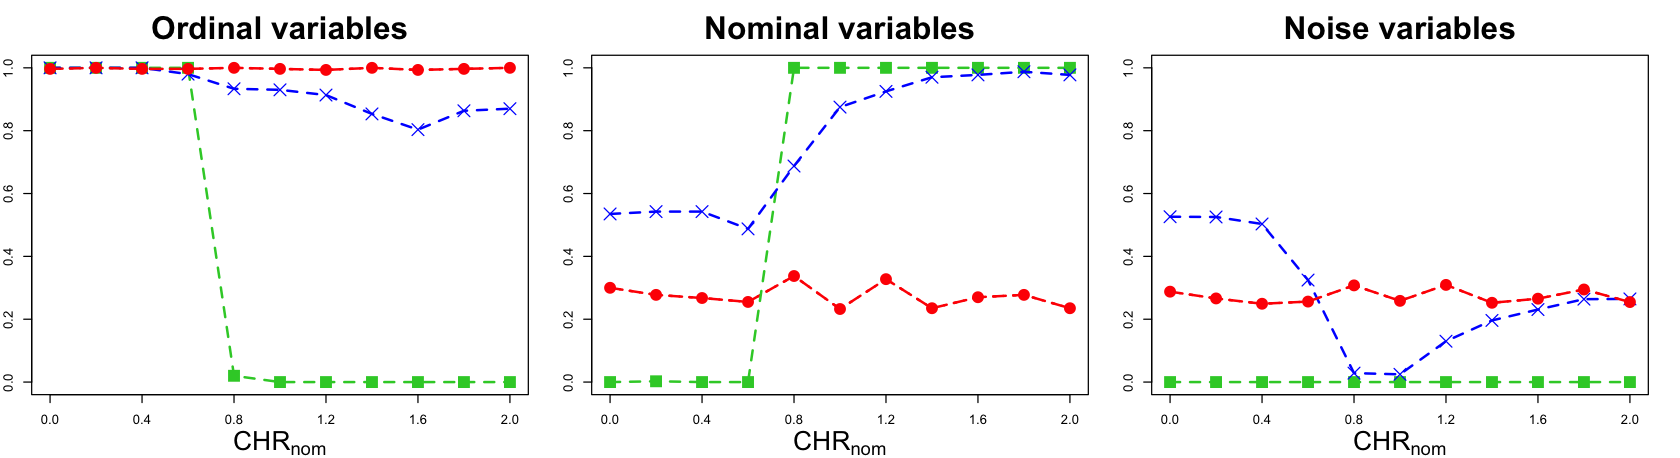

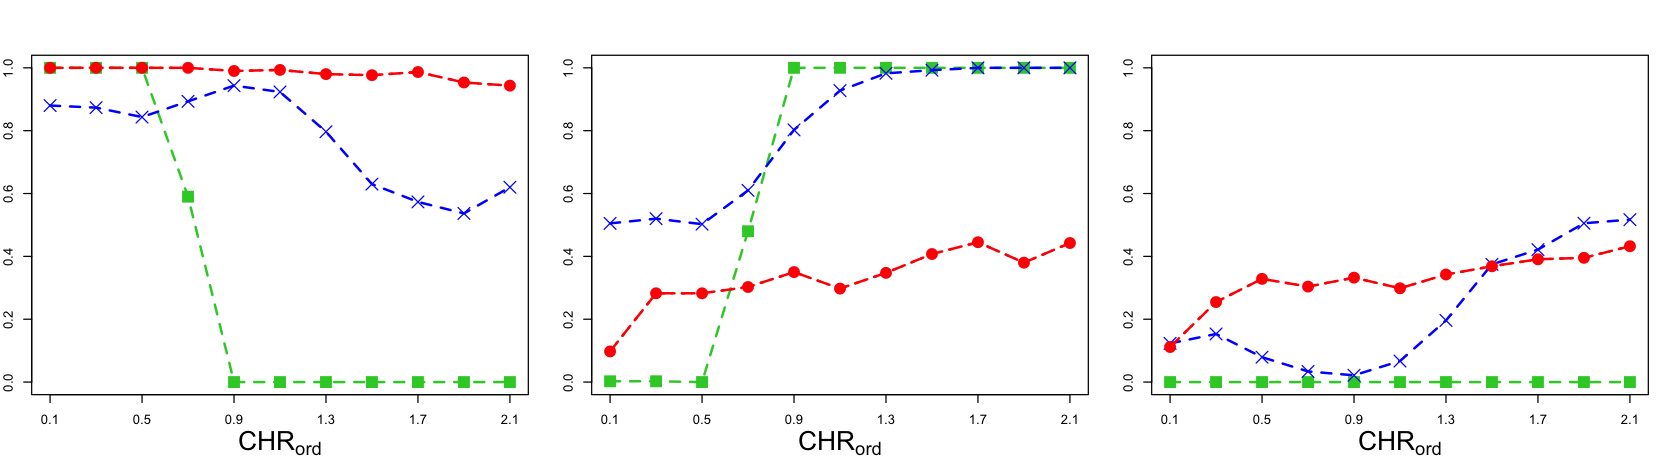

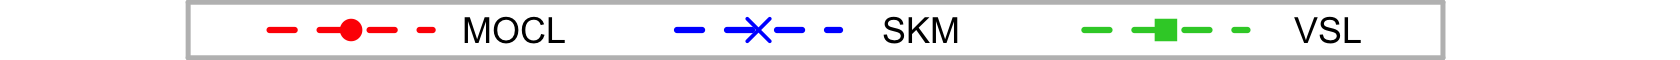

In [32]:
####################################################
##################### CHR_nom ######################

options(repr.plot.width = 11*(14/11), repr.plot.height = 3*(14/11))
par(mfrow=c(1,3))
par(mar=c(4,2,3.5,2))

tp_ord=var_chr_nom$tp_ord
tp_nom=var_chr_nom$tp_nom
tp_noi=var_chr_nom$tp_noi

CHR=c(0:10)/5
###############################
# Tp of ordinal variables (CHR_nom)

plot(CHR,tp_ord[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{nom}$"),ylab="",main="Ordinal variables",cex.main=2.4,cex.lab=2)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1)-0.1)

for(i in c(3:1)){
    lines(CHR,tp_ord[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,tp_ord[,i],pch=pch_lst[i],col=col_lst[i],cex=2)
}

###############################
# Tp of nominal variables (CHR_nom)

plot(CHR,tp_nom[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{nom}$"),ylab="",main="Nominal variables",cex.main=2.4,cex.lab=2)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1)-0.1)

for(i in c(3:1)){
    lines(CHR,tp_nom[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,tp_nom[,i],pch=pch_lst[i],col=col_lst[i],cex=2)
}
###############################
# Tp of noise variables (CHR_nom)

plot(CHR,tp_noi[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{nom}$"),ylab="",main="Noise variables",cex.main=2.4,cex.lab=2)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1)-0.1)

for(i in c(3:1)){
    lines(CHR,tp_noi[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,tp_noi[,i],pch=pch_lst[i],col=col_lst[i],cex=2)
}

####################################################
##################### CHR_ord ######################
tp_ord=var_chr_ord$tp_ord
tp_nom=var_chr_ord$tp_nom
tp_noi=var_chr_ord$tp_noi
CHR=c(0:10)/5+0.1


###############################
# Tp of ordinal variables

plot(CHR,tp_ord[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{ord}$"),ylab="",main="",cex.main=2.2,cex.lab=2)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1))

for(i in c(3:1)){
    lines(CHR,tp_ord[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,tp_ord[,i],pch=pch_lst[i],col=col_lst[i],cex=2)
}

###############################
# Tp of nominal variables

plot(CHR,tp_nom[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{ord}$"),ylab="",main="",cex.main=2.2,cex.lab=2)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1))

for(i in c(3:1)){
    lines(CHR,tp_nom[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,tp_nom[,i],pch=pch_lst[i],col=col_lst[i],cex=2)
}
###############################
# Tp of noise variables
plot(CHR,tp_noi[,1],type="l",xlim=c(min(CHR),max(CHR)),ylim=c(0,1),col=col_lst[1],lwd=2,lty=3,xaxt='n',
    xlab=TeX("$CHR_{ord}$"),ylab="",main="",cex.main=2.2,cex.lab=2)
axis(1,at=c(0.1,0.5,0.9,1.3,1.7,2.1))

for(i in c(3:1)){
    lines(CHR,tp_noi[,i],type="l",ylim=c(0,1),col=col_lst[i],lwd=2,lty=2)
    points(CHR,tp_noi[,i],pch=pch_lst[i],col=col_lst[i],cex=2)
}

######################################################################
####################### Legend ####################################
options(repr.plot.width = 14, repr.plot.height = 0.5)
par(mar=c(0,2,0,2))
par(mfrow=c(1,1))
text_lst=c("MOCL","SKM","VSL","Kmpp","PAM")

plot(0,xlim=c(0.1,1),ylim=c(9,11), axes = FALSE, xlab = "", ylab = "", type = "n")
#lines(c())
for(i in c(1:3)){
    y_l=10
    lines(c(-0.05,0.05)+0.25*i,c(y_l,y_l),lwd=5,lty=2,col=col_lst[i])
    points(0.25*i,y_l,pch=pch_lst[i],col=col_lst[i],cex=2.5,lwd=3)
    text(0.25*i+0.1,y_l,text_lst[i],cex=1.8)
}

# grey box
lines(c(0.15,0.92),c(11,11),lwd=4,col="grey")
lines(c(0.15,0.92),c(9,9),lwd=4,col="grey")
lines(c(0.15,0.15),c(9,11),lwd=4,col="grey")
lines(c(0.92,0.92),c(9,11),lwd=4,col="grey")

## Kendall Correlations between MOCL clusters and True Ordinal clusters

In [33]:
kendall_nom=readRDS("Simulation_CHI_nom_kendall.RData")
kendall_ord=readRDS("Simulation_CHI_ord_kendall.RData")

### Mean Values of Kendall Correlations

In [34]:
cat("CHR_nom")
kendall_mean_nom=t(as.matrix(round(kendall_nom$mean,3)))
colnames(kendall_mean_nom)=CHR=c(0:10)/5
kendall_mean_nom

cat("CHR_ord")
kendall_mean_ord=t(as.matrix(round(kendall_ord$mean,3)))
colnames(kendall_mean_ord)=CHR=c(0:10)/5+0.1
kendall_mean_ord

CHR_nom

0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2
0.967,0.969,0.966,0.966,0.966,0.966,0.96,0.968,0.966,0.968,0.968


CHR_ord

0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1
1,1,0.998,0.983,0.939,0.895,0.862,0.829,0.794,0.763,0.724


### 1se Values of Kendall Correlations

In [35]:
cat("CHR_nom")
kendall_1se_nom=t(as.matrix(round(kendall_nom$se,4)))
colnames(kendall_1se_nom)=CHR=c(0:10)/5
kendall_1se_nom

cat("CHR_ord")
kendall_1se_ord=t(as.matrix(round(kendall_ord$se,4)))
colnames(kendall_1se_ord)=CHR=c(0:10)/5+0.1
kendall_1se_ord

CHR_nom

0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2
0.0017,0.0014,0.0017,0.0016,0.0015,0.0013,0.0019,0.0014,0.0014,0.0016,0.0016


CHR_ord

0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1
0,1e-04,4e-04,0.001,0.0022,0.0026,0.0024,0.0028,0.0032,0.0034,0.0044
